# **Week 0 Main Assignment**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [1]:
import time  # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    arr = np.loadtxt(data_path, delimiter=",", dtype=float)
    return arr


load_data("spice_locations.txt")

array([[-2.12729941e+00,  1.75357153e+00],
       [-3.40030291e-01, -6.70757901e-03],
       [-3.21990680e+00, -2.22002740e+00],
       [-3.70958194e+00,  1.33088073e+00],
       [-9.94424941e-01,  5.40362889e-01],
       [-3.89707753e+00,  1.84954926e+00],
       [ 1.62213204e-01, -1.93830445e+00],
       [-3.09087516e+00, -2.08297745e+00],
       [-2.47878879e+00, -3.76217842e-01],
       [-1.84027491e+00, -1.54385430e+00],
       [-9.40735526e-01, -2.30253070e+00],
       [-2.53927676e+00, -1.16819078e+00],
       [-1.71965008e+00,  9.25879807e-01],
       [-3.00163109e+00, -4.28827808e-01],
       [-1.03792716e+00, -2.76774794e+00],
       [-9.62275740e-01, -2.14737938e+00],
       [-3.67474204e+00,  1.74442769e+00],
       [ 8.28160165e-01,  1.04198674e+00],
       [-2.47693115e+00, -2.51163943e+00],
       [-5.78834867e-01, -7.99237531e-01],
       [-3.38980883e+00, -5.24115449e-01],
       [-3.82805739e+00,  1.54660201e+00],
       [-2.70610009e+00,  3.12611422e-01],
       [-2.

In [3]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    if init_centers is not None:
        return init_centers

    N = data.shape[0]
    choices = np.random.randint(N, size=K)

    init_centers = data[choices]
    return init_centers


initialise_centers(load_data("spice_locations.txt"), 4)

array([[ 2.59797123,  6.56622394],
       [ 5.53428672,  6.64503584],
       [-2.47693115, -2.51163943],
       [ 5.64803089,  6.18778736]])

In [4]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    N = data.shape[0]
    return np.ones(N)


initialise_labels(load_data("spice_locations.txt"))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [5]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    d = data[:, np.newaxis, :]
    c = centers[np.newaxis, :, :]

    arr = d - c
    arr = (arr[:, :, 0] ** 2 + arr[:, :, 1] ** 2) ** 0.5

    return arr


_data = load_data("spice_locations.txt")
_distances = calculate_distances(_data, initialise_centers(_data, 4))
_distances

array([[ 7.96398847,  2.83858161,  2.3510259 ,  6.19479185],
       [ 8.08196275,  1.80813663,  2.69486629,  5.47139521],
       [11.56890173,  5.384504  ,  1.80445013,  9.09967964],
       [ 9.48205018,  4.40940437,  1.89677846,  7.83161894],
       [ 8.02312981,  1.9324921 ,  2.22894754,  5.66995802],
       [ 9.35273729,  4.60988379,  2.448025  ,  7.88157101],
       [ 9.54460483,  3.45416867,  3.50548576,  6.6047102 ],
       [11.38121424,  5.19661503,  1.65655533,  8.91293406],
       [ 9.68655895,  3.67594735,  0.52548252,  7.41440446],
       [10.19642536,  3.94316429,  1.60997896,  7.61402632],
       [10.36234319,  4.11667527,  2.78532817,  7.54972593],
       [10.32384953,  4.17834708,  0.87202588,  7.91380602],
       [ 8.21920984,  2.47854284,  1.86512949,  6.11741682],
       [10.08401471,  4.15990454,  0.        ,  7.88817726],
       [10.8177229 ,  4.58315118,  3.05396144,  7.9760243 ],
       [10.237194  ,  3.9837441 ,  2.6669064 ,  7.44322769],
       [ 9.22147569,  4.

In [6]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    labels = np.argmin(distances, axis=1)
    return labels


_labels = update_labels(_distances)
_labels

array([2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 3, 3, 0, 0, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0])

In [7]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    N = data.shape[0]
    brr = np.arange(K)
    crr = brr[:, np.newaxis] == labels[np.newaxis, :]
    ncrr = crr == False
    arr = np.repeat(data[np.newaxis, ...], K, axis=0)
    arr = np.reshape(arr, (K, N, 2))
    arr[ncrr] = 0
    drr = np.sum(arr, axis=1) / np.reshape(np.repeat(np.count_nonzero(crr, axis=1), 2), (K, 2))
    
    return drr


update_centers(_data, _labels, 4)

array([[ 4.5207275 ,  6.3123981 ],
       [ 0.02726227,  0.51378709],
       [-2.53300302, -0.66426284],
       [ 4.50686804,  3.91142847]])

In [8]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return all(labels1 == labels2)


print(check_termination(np.array([1, 2]), np.array([1, 2])))
print(check_termination(np.array([1, 2]), np.array([1, 3])))

True
False


In [9]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path: str, K: int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time()  # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new):
            break
        else:
            labels = labels_new

    end_time = time.time()  # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time

In [10]:
### TODO 7
def visualise(data_path, labels, centers):
    # Scatter plot of the data points
    data = load_data(data_path=data_path)
    K = centers.shape[0]
    plt.scatter(data[:, 0], data[:, 1], c=labels)
    plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red')

    ### Set title as 'K-means clustering'
    plt.title("K-means clustering")

    ### Set xlabel as 'Longitude'
    plt.xlabel("Longitude")

    ### Set ylabel as 'Latitude'
    plt.ylabel("Latitude")

    ### Save the plot as 'kmeans.png'
    plt.savefig("kmeans.png")

    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.00029778480529785156


<module 'matplotlib.pyplot' from '/home/shawn/Work/iitb/events/data_davinci/repo/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

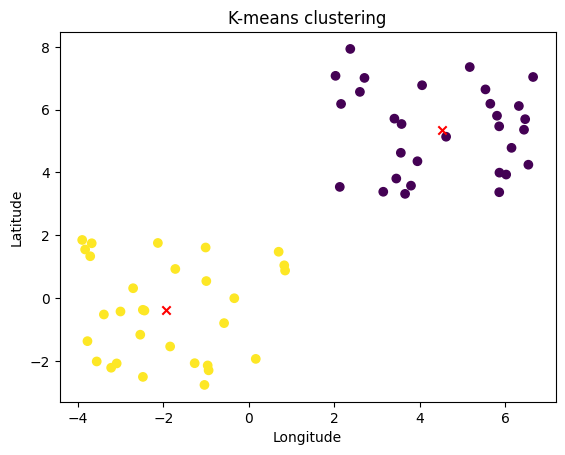

In [11]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)